<a href="https://colab.research.google.com/github/M0n1ka-05/team1-telecom-churn-data-analysis/blob/main/Monika_Shinde_Team_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# ***Churn*** rate is the percentage of subscribers to a service that 
discontinue their subscription to that service in a given time period.

So, here we are having a dataset of French multinational telecommunications corporation. And our tsk is to explore and analyze dataset, discover the factor responsible for churn, and come up with recommendation to ensure retention. 



---

From just a genral idea , why people will leave any telecom services, there are few basic reasons: 
1. Network Issues
2. Price
3. Poor Customer services etc.

Lets not assume any more , and analyze our actual dataset, and find out what caused churn there:

# **Key Points after observation of dataset:**
  

1.   Column churn having value true are all customer who left , telecom service 
2.   Network conectivity of area might be reponsible for customer to change     there network provider.
3.   Account length might be the number of days , customer has used particular service.
4. Nunber and frequency of Customer care calls is more for customer who have cancelled subscription
5. No. of churn is more where number of customer service calls are more than 3.
6. Approx account lenght is 102.
7. Price might not be considered as direct source which is affecting churn , as there is no difference is charges, statwise or area code wise.
8. As per some initial observations, we can say that people having International plans are likely , to leave telecom services.






In [ ]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
df = pd.read_csv(working_directory + 'telecom_churn.csv')

# So lets, start with our basic observation of dataset:

In [44]:
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [46]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [83]:
df['Effective_charge'] = df.apply(lambda x: (x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'])/(x['Total day minutes']+x['Total eve minutes']+x['Total night minutes']+x['Total intl minutes']),axis=1)

In [47]:
#No. of values with Churn == True
cutomer_who_left = len(df[df['Churn'] == True])

In [48]:
#No. of values with Churn == True(Existing Customer)
total_customer = len(df['Churn'])

In [49]:
#this is the approx churn percentage 
Percentage_of_cutomer_cancelled_subscription = (cutomer_who_left/total_customer)* 100

print(f'Approx % of consumer who have cancelled there subscrition are: {Percentage_of_cutomer_cancelled_subscription} ')

Approx % of consumer who have cancelled there subscrition are: 14.491449144914492 


In [109]:
#convrting Churn to 0 and 1 for better understanding 
def func1(i):
  if i is True:
    return (1)
  return (0)


In [110]:
df['Churn'] = df['Churn'].apply(func1)

In [112]:
df[df['Churn'] == 1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AreaCode,Effective_charge
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1,IN415,0.093594
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1,NY415,0.113004
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1,CO408,0.080474
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1,AZ408,0.100353
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1,MD408,0.109381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,1,CA415,0.114968
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,1,IL510,0.101719
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,1,GA510,0.104054
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,1,MD408,0.113524


In [118]:
#now to simply out work lets make seprate df on basis of Chhurn data

df_of_churn = df[df['Churn']==True]

In [119]:
df_existing_cust = df[df['Churn']==False]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


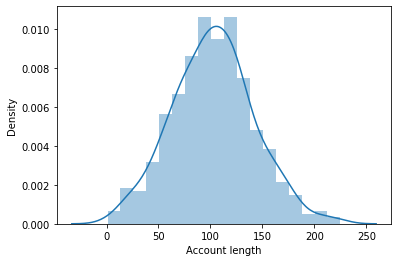

In [120]:
# account length  is somewht near  101 (approx)
sns.distplot(df_of_churn['Account length'],hist=True)

In [121]:
df_of_churn['Account length'].mean()

102.66459627329192

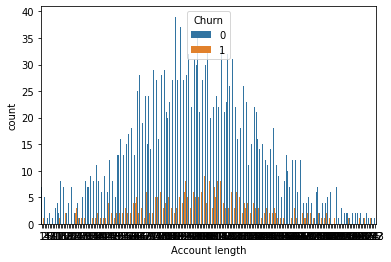

In [122]:
sns.countplot(x='Account length' , hue = 'Churn', data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


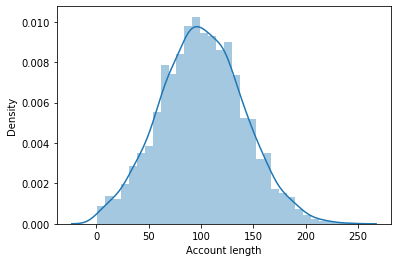

In [55]:
#existing customer
sns.distplot(df_existing_cust['Account length'],hist=True)

In [56]:
# frequency of customer calls is more for chruned dataset

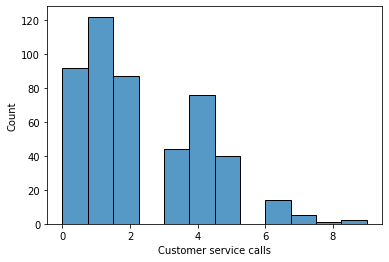

In [57]:
sns.histplot(df_of_churn['Customer service calls'])


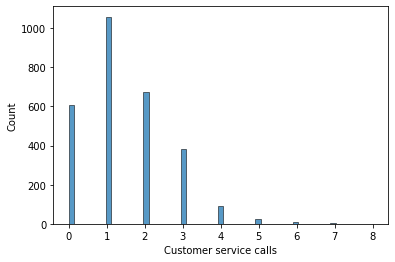

In [58]:
sns.histplot(df_existing_cust['Customer service calls'])

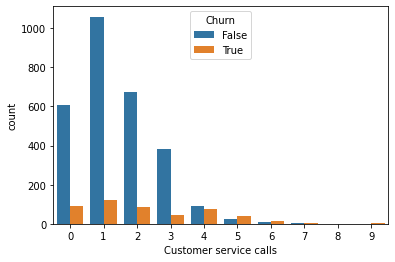

In [59]:
sns.countplot(x='Customer service calls' , hue = 'Churn', data = df)

In [62]:
pd.crosstab(df['Customer service calls'], df['Churn'])

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


 Now from above given crosstab, we can ge one rough idea, that number of churn increased with more number of customer care call.

 And it is an important observation, as it can help us to get into some conclusion 

In [63]:
#statewise count 
df_of_churn.groupby('State')['State'].count().sort_values(ascending = True)

State
AK     3
IA     3
HI     3
AZ     4
LA     4
NE     5
VA     5
TN     5
DC     5
IL     5
NM     6
RI     6
ND     6
WI     7
MO     7
AL     8
GA     8
PA     8
KY     8
FL     8
SD     8
VT     8
OK     9
NH     9
WY     9
CA     9
CO     9
DE     9
ID     9
IN     9
WV    10
UT    10
OH    10
AR    11
OR    11
MA    11
NC    11
CT    12
KS    13
ME    13
NV    14
SC    14
WA    14
MT    14
MS    14
MN    15
NY    15
MI    16
MD    17
NJ    18
TX    18
Name: State, dtype: int64

In [64]:
df_existing_cust.groupby('State')['State'].count().sort_values(ascending = True)

State
CA    25
PA    37
IA    41
AR    44
SC    46
GA    46
NH    47
LA    47
TN    48
AK    49
DC    49
ME    49
NJ    50
HI    50
KY    51
MS    51
NV    52
WA    52
SD    52
OK    52
DE    52
IL    53
MD    53
MA    54
TX    54
MT    54
FL    55
MO    56
ND    56
NE    56
NM    56
CO    57
KS    57
NC    57
MI    57
RI    59
AZ    60
IN    62
UT    62
CT    62
ID    64
VT    65
OR    67
WY    68
OH    68
NY    68
MN    69
WI    71
VA    72
AL    72
WV    96
Name: State, dtype: int64

In [65]:
pd.crosstab(df['State'], df['Churn'])

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


In [66]:
df['State_AreaCode'] = df[['State', 'Area code']].apply(lambda x:  x['State'] + str(x["Area code"]), axis = 1) 

In [67]:
pd.crosstab(df['State_AreaCode'], df['Churn'])

Churn,False,True
State_AreaCode,,
AK408,14,0
AK415,21,3
AK510,14,0
AL408,21,4
AL415,37,3
...,...,...
WV415,49,3
WV510,28,6
WY408,17,0


In [68]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AreaCode
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,KS415


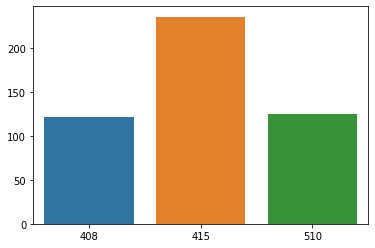

In [123]:
#area code analysis for churned dataset

arc,count= np.unique(df_of_churn['Area code'],return_counts=True)
sns.barplot(x=arc, y= count)

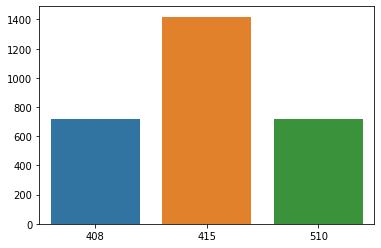

In [70]:
arc,count= np.unique(df_existing_cust['Area code'],return_counts=True)
sns.barplot(x=arc, y= count)

In [71]:
np.unique(df['Area code'])

array([408, 415, 510])

In [73]:
#from here we can get proper churn detail area wise
pd.crosstab(df['Area code'], df['Churn'])


Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


In [77]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AreaCode,Effective_charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,KS415,0.105354


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


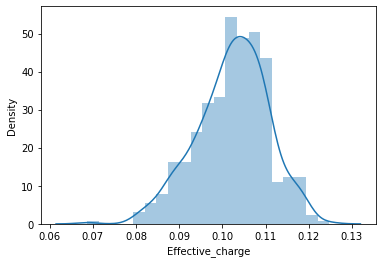

In [84]:
sns.distplot(df_of_churn['Effective_charge'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


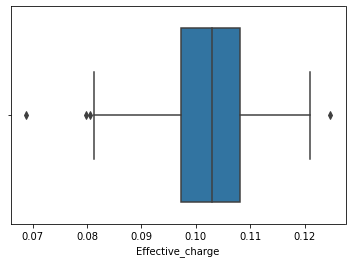

In [85]:
sns.boxplot(df_of_churn['Effective_charge'])

In [96]:
def transform(i):
  if i == 'Yes':
    return (1)
  return (0)

In [158]:
df['International plan'] = df['International plan'].apply(transform)

In [157]:
#Chrun analysis considering column International plans
pd.crosstab(df_of_churn['International plan'], df_of_churn['Churn'])

Churn,1
International plan,
No,346
Yes,137


In [ ]:

df[(df["International plan"]=='No')&(df["Churn"]==True)]


In [93]:
len(df[(df["International plan"]=='No')&(df["Churn"]==True)])

346

In [94]:
len(df[(df["International plan"]=='Yes')&(df["Churn"]==True)]) #had international plan , and left services.

137

In [95]:
#Voice Mail Plan
len(df[(df["Voice mail plan"]=='No')&(df["Churn"]==True)])

403

In [ ]:
df[(df["Voice mail plan"]=='No')&(df["Churn"]==True)]

In [ ]:
len(df[(df["Voice mail plan"]=='Yes')&(df["Churn"]==True)])

From above we can consider like ,people not using Voice mail plan likely to be leaving services.But lets not conclude now , and explore bit further.

In [124]:
#considering a small dataset of International Call, Voice Mail plan and Churn(Obviously)

new_df = df[['International plan', 'Voice mail plan','Churn']]

In [159]:
new_df['International plan'] = new_df['International plan'].apply(transform)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df['Voice mail plan'] = new_df['Voice mail plan'].apply(transform)

In [100]:
pd.crosstab(new_df['International plan'], new_df['Churn'])

Churn,False,True
International plan,,
0,2664,346
1,186,137


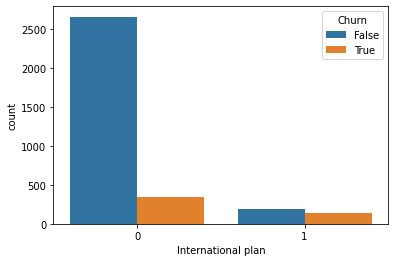

In [101]:
sns.countplot(x='International plan' , hue = 'Churn', data=new_df)

In [102]:
pd.crosstab(new_df['Voice mail plan'], new_df['Churn'])

Churn,False,True
Voice mail plan,,
0,2008,403
1,842,80


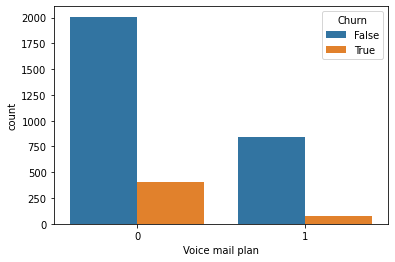

In [103]:
sns.countplot(x='Voice mail plan' , hue = 'Churn', data=new_df)

In [105]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AreaCode,Effective_charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,KS415,0.105354
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,OH415,0.094754
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,NJ415,0.115480
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,OH408,0.118272
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,OK415,0.101738


In [125]:
#Number vmail messages

pd.crosstab(df['Number vmail messages'], new_df['Churn'])

Churn,0,1
Number vmail messages,,
0,2008,403
4,1,0
8,2,0
9,2,0
10,1,0
11,2,0
12,6,0
13,4,0
14,7,0


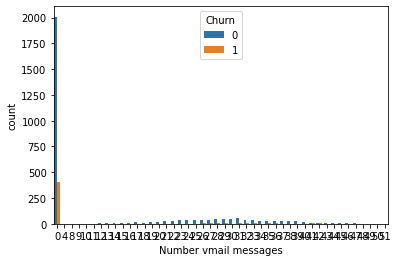

In [127]:
sns.countplot(x='Number vmail messages' , hue = 'Churn', data=df)

From all above observation, we kinda found out that, International Plan and Customer Service Calls are columns which can give us insight , and can help us to solve this puzzle.. of **why people CHURN** 

In [140]:
pd.crosstab(df['Customer service calls'],df['Churn'])

Churn,0,1
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


In [141]:
Customer_call_churn= pd.crosstab(df['Customer service calls'],df['Churn'])

In [142]:
Customer_call_churn['churn_rate']=Customer_call_churn.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)

So from this Customer call data given below we can conclude that,
Churn % is somewhat directly proportional to frequency f customer services call. More calls , more CHURN..

In [143]:
Customer_call_churn

Churn,0,1,churn_rate
Customer service calls,,,
0,605,92,13.199426
1,1059,122,10.330229
2,672,87,11.462451
3,385,44,10.256410
4,90,76,45.783133
5,26,40,60.606061
6,8,14,63.636364
7,4,5,55.555556
8,1,1,50.000000


In [146]:
def func2(n):
  if n > 3:
    return(1)
  return(0)

In [154]:
df['customer_service_quality'] = df['Customer service calls'].apply(func2)

In [155]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AreaCode,Effective_charge,service_quality,customer_service_quality
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,KS415,0.105354,0,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,OH415,0.094754,0,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,NJ415,0.115480,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,OH408,0.118272,0,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,OK415,0.101738,0,0


We know we have two important factor, International Plans and Customer service calls, so why not combine them and see the associative effect, and compare with CHURN

In [160]:
df['bad_service']=df.apply(lambda x: x['International plan']+x['customer_service_quality'],axis=1)

In [161]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AreaCode,Effective_charge,service_quality,customer_service_quality,bad_service
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,KS415,0.105354,0,0,0
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,OH415,0.094754,0,0,0
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,NJ415,0.115480,0,0,0
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,OH408,0.118272,0,0,1
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,OK415,0.101738,0,0,1


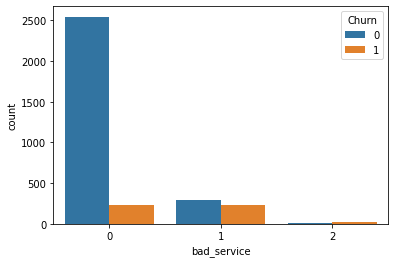

In [162]:
sns.countplot(x=df['bad_service'],hue=df['Churn'])

In [ ]:
Now lets read this graph: 
0: When consumer is neither having international plan, nor having customer service calls.
1: When consumer is either having international plan, or having customer service calls.
2 When consumer is having both international plan and having customer service calls(not at all happy with telecom service).